# Data import and processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('./Year 2 Data_VARIABLESFORCDSANALYSIS.xlsx')
data

,serial,LA,CoastComm,UrbRur2,IMD10,Gend3,Impair4,Disab3,Eth7,Relig7,...,Educ6,WorkStat10,BMIG,MEMS7_SPORTCOUNT_A01,MEMS7_WALKLEISURE_B01,MEMS7_WALKTRAV_B02,MEMS7_GARD_B08,AGE,HHLiv12,Year
0,170670462637181,285,2,2,9,1.0,0,3,1,-98,...,1,1,2,560.0,560.0,0.0,-89.0,48,6,2
1,161172095277582,112,2,2,2,2.0,0,3,1,-98,...,1,2,2,-89.0,-89.0,60.0,-89.0,56,7,2
2,170970763314981,277,1,1,8,1.0,0,3,1,8,...,1,2,2,420.0,420.0,0.0,-89.0,72,5,2
3,170772124803781,218,2,1,1,1.0,0,3,1,-98,...,2,5,2,1800.0,0.0,0.0,-89.0,68,5,2
4,170580035069182,160,2,1,10,1.0,0,3,1,-98,...,5,10,4,180.0,0.0,0.0,-89.0,67,-99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196640,171071714465882,15,2,1,8,2.0,3,1,1,-98,...,6,10,3,0.0,0.0,0.0,0.0,95,1,2
196641,171071814621282,308,2,2,2,1.0,-98,-99,1,-98,...,1,5,2,0.0,0.0,0.0,0.0,95,11,2
196642,171072385278581,322,2,1,8,2.0,3,1,1,8,...,5,5,2,0.0,0.0,0.0,0.0,95,1,2
196643,171080075647582,260,2,1,2,2.0,3,1,1,-98,...,6,5,-95,0.0,0.0,0.0,0.0,95,4,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196645 entries, 0 to 196644
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   serial                 196645 non-null  int64  
 1   LA                     196645 non-null  int64  
 2   CoastComm              196645 non-null  int64  
 3   UrbRur2                196645 non-null  int64  
 4   IMD10                  196645 non-null  int64  
 5   Gend3                  196642 non-null  float64
 6   Impair4                196645 non-null  int64  
 7   Disab3                 196645 non-null  int64  
 8   Eth7                   196645 non-null  int64  
 9   Relig7                 196645 non-null  int64  
 10  NSSEC5                 196645 non-null  int64  
 11  Child4                 196645 non-null  int64  
 12  Educ6                  196645 non-null  int64  
 13  WorkStat10             196645 non-null  int64  
 14  BMIG                   196645 non-nu

In [4]:
data.isnull().sum()

serial                   0
LA                       0
CoastComm                0
UrbRur2                  0
IMD10                    0
Gend3                    3
Impair4                  0
Disab3                   0
Eth7                     0
Relig7                   0
NSSEC5                   0
Child4                   0
Educ6                    0
WorkStat10               0
BMIG                     0
MEMS7_SPORTCOUNT_A01     0
MEMS7_WALKLEISURE_B01    0
MEMS7_WALKTRAV_B02       0
MEMS7_GARD_B08           0
AGE                      0
HHLiv12                  0
Year                     0
dtype: int64

In [5]:
# View the numerical status of each feature
for feature in data.columns:
    print(f'{feature}: {data[feature].unique()}') 

serial: [170670462637181 161172095277582 170970763314981 ... 171072385278581
 171080075647582 171080356606581]
LA: [285 112 277 218 160 260 192  54 275 111  92 309 123 286 303 177 222  83
 162  29 226  19 125 278 143 201  30 319 246 239 101 155 250 262 165 302
 183 313 289 300 202  85 161  25 321   2 190 182 240  15  23  98 269 288
 164   5 180  24 280 145 231 141 281 203 318  57 117  13 195   7  66  78
 127 109 282  80 115 153  55 178 322  88  11 283 254 179  45 100 197 266
  16  75  74  65 105 187 108  95 136  86 311 207 271  32  39 297   9  53
   8 253 251  68 257 320 263 308 219   6  89 159 242 172 245 274 167  69
 273 247  71 216 296 142 261  12 265 194  48 213 298 293 243 301  93 137
 238 174 292 214 157 129 193  73 215 249 305 130 204  46 212 228  67  20
 200  56 306  28 186 208  99 205  87 148  61 185  76 270  34  35  18  94
 198 171  91 316 156 284 121  27 149  49 118 188 264 163  22 315 225 227
 151  79  70 102  59 211 169 128  37 325  43 196 304 234  17 258 307  62
  14 236 

In [6]:
pd.set_option('max_colwidth', 30)
Newdata = data[['CoastComm','UrbRur2','IMD10','Gend3','Impair4','Disab3','Eth7','Relig7','NSSEC5','Child4','Educ6','WorkStat10','BMIG','AGE','MEMS7_SPORTCOUNT_A01']]
Newdata

,CoastComm,UrbRur2,IMD10,Gend3,Impair4,Disab3,Eth7,Relig7,NSSEC5,Child4,Educ6,WorkStat10,BMIG,AGE,MEMS7_SPORTCOUNT_A01
0,2,2,9,1.0,0,3,1,-98,1,2,1,1,2,48,560.0
1,2,2,2,2.0,0,3,1,-98,2,1,1,2,2,56,-89.0
2,1,1,8,1.0,0,3,1,8,2,1,1,2,2,72,420.0
3,2,1,1,1.0,0,3,1,-98,1,1,2,5,2,68,1800.0
4,2,1,10,1.0,0,3,1,-98,2,-99,5,10,4,67,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196640,2,1,8,2.0,3,1,1,-98,5,1,6,10,3,95,0.0
196641,2,2,2,1.0,-98,-99,1,-98,5,-99,1,5,2,95,0.0
196642,2,1,8,2.0,3,1,1,8,5,1,5,5,2,95,0.0
196643,2,1,2,2.0,3,1,1,-98,5,1,6,5,-95,95,0.0


In [7]:
Newdata.describe().T

,count,mean,std,min,25%,50%,75%,max
CoastComm,196645.0,1.973917,0.346571,-95.0,2.0,2.00,2.0,2.0
UrbRur2,196645.0,1.214305,0.512921,-95.0,1.0,1.00,1.0,2.0
IMD10,196645.0,5.502779,2.889188,-95.0,3.0,6.00,8.0,10.0
Gend3,196642.0,1.429252,3.623729,-99.0,1.0,2.00,2.0,2.0
Impair4,196645.0,-5.522368,23.397846,-99.0,0.0,0.00,0.0,3.0
Disab3,196645.0,-3.036370,22.782600,-99.0,2.0,3.00,3.0,3.0
Eth7,196645.0,-2.214412,18.167557,-99.0,1.0,1.00,1.0,7.0
Relig7,196645.0,-72.185497,44.183945,-98.0,-98.0,-98.00,1.0,8.0
NSSEC5,196645.0,2.054596,1.495452,-96.0,1.0,2.00,3.0,5.0
Child4,196645.0,-4.793771,24.228463,-99.0,1.0,1.00,1.0,4.0


In [8]:
Newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196645 entries, 0 to 196644
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CoastComm             196645 non-null  int64  
 1   UrbRur2               196645 non-null  int64  
 2   IMD10                 196645 non-null  int64  
 3   Gend3                 196642 non-null  float64
 4   Impair4               196645 non-null  int64  
 5   Disab3                196645 non-null  int64  
 6   Eth7                  196645 non-null  int64  
 7   Relig7                196645 non-null  int64  
 8   NSSEC5                196645 non-null  int64  
 9   Child4                196645 non-null  int64  
 10  Educ6                 196645 non-null  int64  
 11  WorkStat10            196645 non-null  int64  
 12  BMIG                  196645 non-null  int64  
 13  AGE                   196645 non-null  int64  
 14  MEMS7_SPORTCOUNT_A01  196645 non-null  float64
dtype

In [9]:
Newdata.isnull().sum()

CoastComm               0
UrbRur2                 0
IMD10                   0
Gend3                   3
Impair4                 0
Disab3                  0
Eth7                    0
Relig7                  0
NSSEC5                  0
Child4                  0
Educ6                   0
WorkStat10              0
BMIG                    0
AGE                     0
MEMS7_SPORTCOUNT_A01    0
dtype: int64

In [34]:
df = Newdata.dropna()
df = df[~df.isin([-89, -90, -91, -92, -93, -94, -95, -96, -97, -98, -99])]
df = df.dropna()
df

,CoastComm,UrbRur2,IMD10,Gend3,Impair4,Disab3,Eth7,Relig7,NSSEC5,Child4,Educ6,WorkStat10,BMIG,AGE,MEMS7_SPORTCOUNT_A01
2,1.0,1.0,8.0,1.0,0.0,3.0,1.0,8.0,2.0,1.0,1.0,2.0,2.0,72.0,420.0
22,2.0,1.0,9.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,67.0,495.0
24,2.0,1.0,6.0,1.0,0.0,3.0,1.0,8.0,2.0,1.0,5.0,5.0,3.0,68.0,1187.5
27,2.0,2.0,7.0,1.0,0.0,3.0,1.0,8.0,1.0,1.0,1.0,1.0,2.0,48.0,150.0
38,2.0,2.0,5.0,1.0,0.0,2.0,1.0,8.0,2.0,1.0,1.0,1.0,2.0,41.0,840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196569,2.0,1.0,10.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,6.0,5.0,2.0,95.0,0.0
196572,2.0,1.0,3.0,2.0,3.0,1.0,1.0,1.0,5.0,1.0,6.0,5.0,2.0,95.0,0.0
196587,2.0,1.0,9.0,2.0,3.0,1.0,1.0,1.0,5.0,1.0,3.0,5.0,1.0,95.0,0.0
196598,2.0,1.0,7.0,1.0,0.0,2.0,1.0,1.0,5.0,1.0,5.0,10.0,2.0,95.0,0.0


In [11]:
# View the numerical status of each feature
for feature in df.columns:
    print(f'{feature}: {df[feature].unique()}') 

CoastComm: [1. 2.]
UrbRur2: [1. 2.]
IMD10: [ 8.  9.  6.  7.  5.  3.  1.  4. 10.  2.]
Gend3: [1. 2.]
Impair4: [0. 2. 3. 1.]
Disab3: [3. 2. 1.]
Eth7: [1. 3. 2. 7. 4. 6. 5.]
Relig7: [8. 1. 7. 3. 5. 2. 6. 4.]
NSSEC5: [2. 1. 3. 5. 4.]
Child4: [1. 2. 3. 4.]
Educ6: [1. 5. 6. 3. 4. 2.]
WorkStat10: [ 2.  5.  1. 10.  7.  6.  3.  9.  8.  4.]
BMIG: [2. 3. 4. 1. 5.]
AGE: [72. 67. 68. 48. 41. 63. 45. 62. 80. 51. 56. 59. 64. 82. 76. 53. 69. 74.
 54. 35. 57. 34. 71. 78. 37. 50. 49. 30. 38. 60. 75. 40. 36. 44. 28. 52.
 43. 47. 24. 70. 61. 46. 23. 16. 21. 55. 85. 79. 65. 77. 66. 42. 58. 84.
 25. 83. 18. 88. 27. 73. 86. 32. 26. 33. 19. 20. 31. 81. 29. 87. 39. 91.
 17. 89. 22. 90. 93. 94. 92. 95.]
MEMS7_SPORTCOUNT_A01: [ 420.   495.  1187.5 ...   28.    26.     8. ]


In [12]:
value_counts = df["MEMS7_SPORTCOUNT_A01"].value_counts()
value_counts

0.0       7303
120.0      748
180.0      694
240.0      662
300.0      658
          ... 
638.0        1
369.5        1
517.0        1
1847.5       1
8.0          1
Name: MEMS7_SPORTCOUNT_A01, Length: 2295, dtype: int64

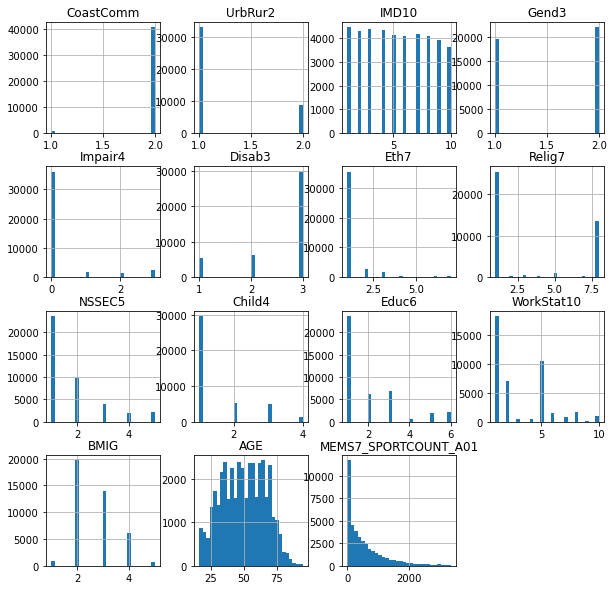

In [13]:
df.hist(bins=30,figsize=(10,10))
# display histogram
plt.show()

D:\ProjectData\anaconda2022.05\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProjectData\anaconda2022.05\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProjectData\anaconda2022.05\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

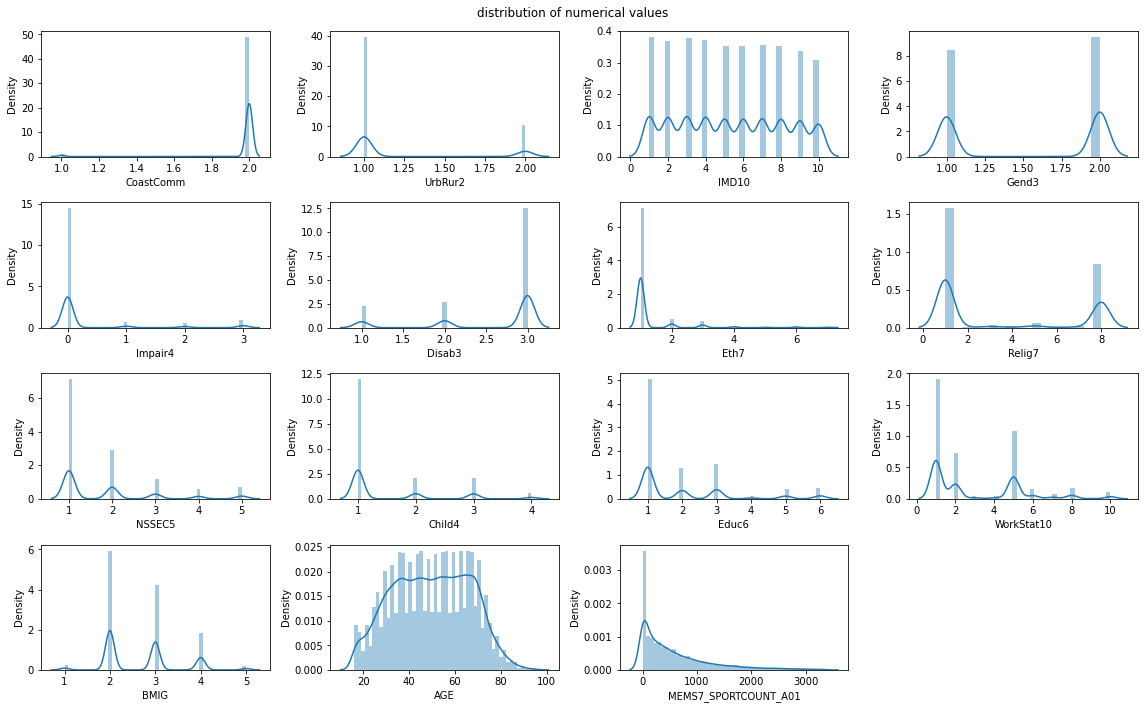

In [14]:
k=1
plt.figure(figsize=(16,10))
plt.suptitle("distribution of numerical values")
for i in df:
    plt.subplot(4,4,k)   
    sns.distplot(df[i])
    #plt.title(i)
    plt.tight_layout()
    k+=1

# Multiple Logistic Regression Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix as skm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
Lrm_df = df

def map_values(value):
    if value > 0 and value <= 149:
        return 1
    elif value > 149:
        return 2
    else:
        return 0

# Apply the mapping function to create the new column 'MEMS7_SPORTCOUNT_A01_mapped'
Lrm_df['MEMS7_SPORTCOUNT_A01'] = Lrm_df['MEMS7_SPORTCOUNT_A01'].apply(map_values)
value_counts = Lrm_df["MEMS7_SPORTCOUNT_A01"].value_counts()
value_counts

2    28187
0     7303
1     6000
Name: MEMS7_SPORTCOUNT_A01, dtype: int64

In [17]:
Lrm_df

,CoastComm,UrbRur2,IMD10,Gend3,Impair4,Disab3,Eth7,Relig7,NSSEC5,Child4,Educ6,WorkStat10,BMIG,AGE,MEMS7_SPORTCOUNT_A01
2,1.0,1.0,8.0,1.0,0.0,3.0,1.0,8.0,2.0,1.0,1.0,2.0,2.0,72.0,2
22,2.0,1.0,9.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,67.0,2
24,2.0,1.0,6.0,1.0,0.0,3.0,1.0,8.0,2.0,1.0,5.0,5.0,3.0,68.0,2
27,2.0,2.0,7.0,1.0,0.0,3.0,1.0,8.0,1.0,1.0,1.0,1.0,2.0,48.0,2
38,2.0,2.0,5.0,1.0,0.0,2.0,1.0,8.0,2.0,1.0,1.0,1.0,2.0,41.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196569,2.0,1.0,10.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,6.0,5.0,2.0,95.0,0
196572,2.0,1.0,3.0,2.0,3.0,1.0,1.0,1.0,5.0,1.0,6.0,5.0,2.0,95.0,0
196587,2.0,1.0,9.0,2.0,3.0,1.0,1.0,1.0,5.0,1.0,3.0,5.0,1.0,95.0,0
196598,2.0,1.0,7.0,1.0,0.0,2.0,1.0,1.0,5.0,1.0,5.0,10.0,2.0,95.0,0


In [18]:
# View the numerical status of each feature
for feature in Lrm_df.columns:
    print(f'{feature}: {Lrm_df[feature].unique()}') 

CoastComm: [1. 2.]
UrbRur2: [1. 2.]
IMD10: [ 8.  9.  6.  7.  5.  3.  1.  4. 10.  2.]
Gend3: [1. 2.]
Impair4: [0. 2. 3. 1.]
Disab3: [3. 2. 1.]
Eth7: [1. 3. 2. 7. 4. 6. 5.]
Relig7: [8. 1. 7. 3. 5. 2. 6. 4.]
NSSEC5: [2. 1. 3. 5. 4.]
Child4: [1. 2. 3. 4.]
Educ6: [1. 5. 6. 3. 4. 2.]
WorkStat10: [ 2.  5.  1. 10.  7.  6.  3.  9.  8.  4.]
BMIG: [2. 3. 4. 1. 5.]
AGE: [72. 67. 68. 48. 41. 63. 45. 62. 80. 51. 56. 59. 64. 82. 76. 53. 69. 74.
 54. 35. 57. 34. 71. 78. 37. 50. 49. 30. 38. 60. 75. 40. 36. 44. 28. 52.
 43. 47. 24. 70. 61. 46. 23. 16. 21. 55. 85. 79. 65. 77. 66. 42. 58. 84.
 25. 83. 18. 88. 27. 73. 86. 32. 26. 33. 19. 20. 31. 81. 29. 87. 39. 91.
 17. 89. 22. 90. 93. 94. 92. 95.]
MEMS7_SPORTCOUNT_A01: [2 1 0]


In [19]:
Lrm_df.corr()

,CoastComm,UrbRur2,IMD10,Gend3,Impair4,Disab3,Eth7,Relig7,NSSEC5,Child4,Educ6,WorkStat10,BMIG,AGE,MEMS7_SPORTCOUNT_A01
CoastComm,1.000000,-0.012850,-0.025157,0.007448,-0.019701,0.017618,0.032626,0.012295,-0.004258,0.018728,-0.029905,-0.013203,-0.019292,-0.044723,0.004804
UrbRur2,-0.012850,1.000000,-0.147229,-0.000216,-0.012269,-0.002296,-0.118753,-0.042054,-0.014593,-0.022412,-0.015054,0.032926,-0.010293,0.128685,0.038068
IMD10,-0.025157,-0.147229,1.000000,0.023419,0.083045,-0.054995,0.147877,0.061851,0.072324,0.024343,0.106382,-0.004779,0.088682,-0.185730,-0.081274
Gend3,0.007448,-0.000216,0.023419,1.000000,0.036672,-0.024717,0.020939,-0.056202,-0.013787,0.048196,-0.010053,0.084328,-0.108345,-0.109685,-0.006033
Impair4,-0.019701,-0.012269,0.083045,0.036672,1.000000,-0.794532,-0.038004,-0.028033,0.144481,-0.099610,0.147077,0.212306,0.184066,0.160368,-0.216708
Disab3,0.017618,-0.002296,-0.054995,-0.024717,-0.794532,1.000000,0.070375,0.027402,-0.140545,0.141828,-0.127789,-0.217167,-0.192506,-0.228341,0.181539
Eth7,0.032626,-0.118753,0.147877,0.020939,-0.038004,0.070375,1.000000,0.042334,0.006571,0.116011,-0.077134,-0.012602,-0.049858,-0.203264,-0.050232
Relig7,0.012295,-0.042054,0.061851,-0.056202,-0.028033,0.027402,0.042334,1.000000,-0.057750,0.050579,-0.117836,-0.063610,-0.051276,-0.251206,0.066982
NSSEC5,-0.004258,-0.014593,0.072324,-0.013787,0.144481,-0.140545,0.006571,-0.057750,1.000000,-0.094329,0.344880,0.380826,-0.008021,0.160178,-0.162395
Child4,0.018728,-0.022412,0.024343,0.048196,-0.099610,0.141828,0.116011,0.050579,-0.094329,1.000000,-0.093255,-0.137171,-0.024415,-0.359208,0.023573


In [20]:
Lrm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CoastComm,41490.0,1.976958,0.150038,1.0,2.0,2.0,2.0,2.0
UrbRur2,41490.0,1.208677,0.406368,1.0,1.0,1.0,1.0,2.0
IMD10,41490.0,5.354109,2.850985,1.0,3.0,5.0,8.0,10.0
Gend3,41490.0,1.528392,0.499199,1.0,1.0,2.0,2.0,2.0
Impair4,41490.0,0.278525,0.780609,0.0,0.0,0.0,0.0,3.0
Disab3,41490.0,2.583683,0.711210,1.0,2.0,3.0,3.0,3.0
Eth7,41490.0,1.323331,0.960668,1.0,1.0,1.0,1.0,7.0
Relig7,41490.0,3.497180,3.257425,1.0,1.0,1.0,8.0,8.0
NSSEC5,41490.0,1.781224,1.137397,1.0,1.0,1.0,2.0,5.0
Child4,41490.0,1.474355,0.836212,1.0,1.0,1.0,2.0,4.0


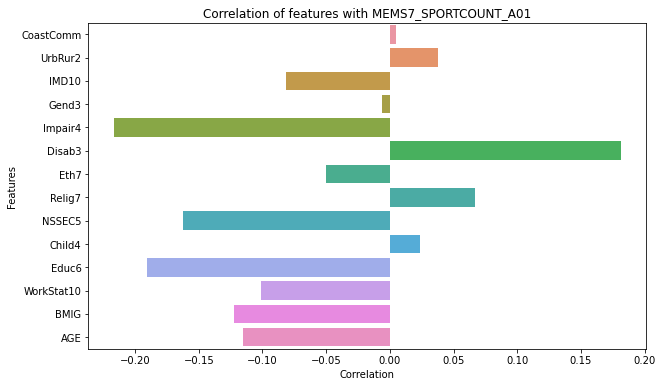

In [21]:
# Choose features and dependent variables
X = Lrm_df.iloc[:, :-1]
y = Lrm_df.iloc[:, -1]  
# Computing the correlation of features with the dependent variable
correlation = X.corrwith(y)

# Visual correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of features with MEMS7_SPORTCOUNT_A01')
plt.show()

In [22]:
# Feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# normalization
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Divide into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.25, random_state=22)


max_features = X_train.shape[1]
best_score = 0
best_num_features = 1
scores = []

for num_features in range(1, max_features + 1):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    fit = rfe.fit(X_train, y_train)
    X_train_selected = X_train[:, fit.support_]
    
    score = cross_val_score(model, X_train_selected, y_train, cv=10).mean()
    scores.append(score)  
    
    if score > best_score:
        best_score = score
        best_num_features = num_features

print(f"Best number of features: {best_num_features}")

Best number of features: 9


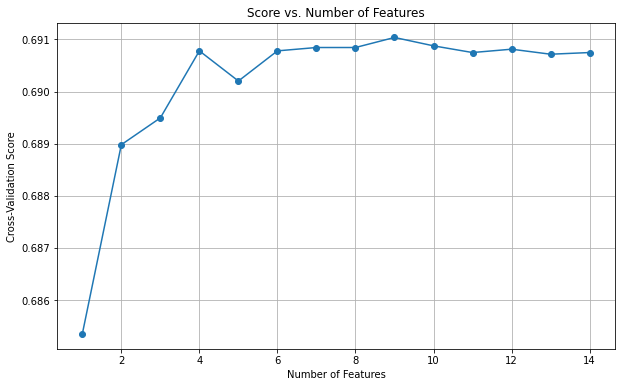

In [23]:
# Plot the relationship between score and number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), scores, marker='o', linestyle='-')
plt.title('Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()

In [24]:
print('Number of Features',range(1, max_features + 1))
print('Cross-Validation score',scores)

Number of Features range(1, 15)
Cross-Validation score [0.6853488099694344, 0.6889800186583969, 0.689494271095433, 0.6907798970234982, 0.6902015011828828, 0.6907799589978012, 0.6908442366790368, 0.6908442470080873, 0.6910370077484405, 0.6908763187098768, 0.690747753018355, 0.6908120306995906, 0.6907156090132122, 0.6907477426893047]


In [25]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=9)  # Select the first 9 features
fit = rfe.fit(X_train, y_train)

# Train the model using the selected features
X_train_selected = X_train[:, fit.support_]
X_test_selected = X_test[:, fit.support_]

model.fit(X_train_selected, y_train)

# Predict and evaluate model performance
y_pred = model.predict(X_test_selected)

confusion_matrix = skm(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class

print("confusion_matrix：\n", confusion_matrix)
print("accuracy：", accuracy)
print("socre of precision：", precision)
print("socre of recall：", recall)
print("socre of F1：", f1)


# Using 10-fold cross-validation
score = cross_val_score(model, X.iloc[:, fit.support_], y, cv=10).mean()
print('CV Accuracy: ',score)
cv_precision = cross_val_score(model, X.iloc[:, fit.support_], y, cv=10, scoring="precision_macro")
print("CV Precision:", cv_precision.mean())
cv_recall = cross_val_score(model, X.iloc[:, fit.support_], y, cv=10, scoring="recall_macro")
print("CV Recall:", cv_recall.mean())
cv_f1 = cross_val_score(model, X.iloc[:, fit.support_], y, cv=10, scoring="f1_macro")
print("CV F1-score:", cv_f1.mean())

D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion_matrix：
 [[ 286    0 1525]
 [  95    0 1439]
 [ 186    0 6842]]
accuracy： 0.6871686108165429
socre of precision： 0.4007150836756293
socre of recall： 0.3771527442332901
socre of F1： 0.35113898844166386
CV Accuracy:  0.6834417932031813


D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classifica

CV Precision: 0.3734125515100595
CV Recall: 0.366267465292854
CV F1-score: 0.3343983878156958


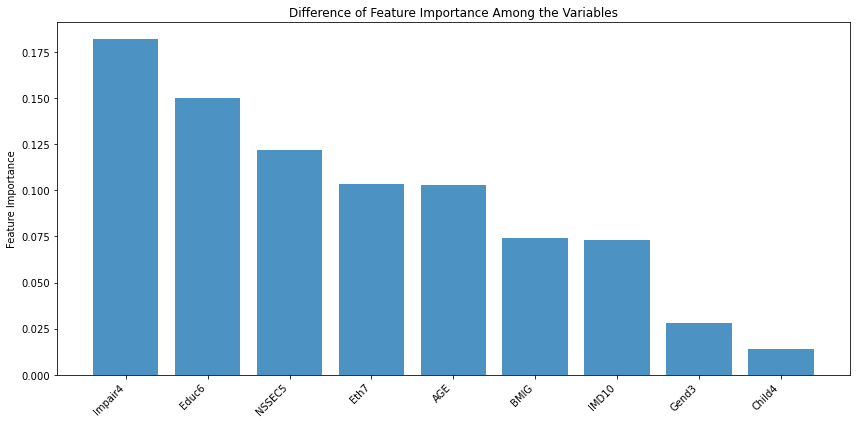

In [26]:
coefficients = model.coef_[0]
feature_importances = np.abs(coefficients)
fig, ax = plt.subplots(figsize=(12, 6))
feature_names = X.iloc[:, fit.support_].columns
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort feature indices based on importance in descending order
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

x_pos = np.arange(len(feature_names))
ax.bar(x_pos, sorted_importances, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_feature_names, rotation=45, ha='right')
ax.set_ylabel('Feature Importance')
ax.set_title('Difference of Feature Importance Among the Variables')
plt.tight_layout()
plt.show()

In [27]:
print('feature_names:',feature_names)
print('feature_importances:',feature_importances)

feature_names: Index(['IMD10', 'Gend3', 'Impair4', 'Eth7', 'NSSEC5', 'Child4', 'Educ6',
       'BMIG', 'AGE'],
      dtype='object')
feature_importances: [0.07281982 0.02827425 0.18190895 0.10332548 0.12207839 0.01404186
 0.14998187 0.07399104 0.10266399]


In [28]:
# Choose four features to reduce overfitting problems
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
rfe_4f = RFE(estimator=model1, n_features_to_select=4)  # Select the first 4 features
fit_4f = rfe_4f.fit(X_train, y_train)

# Train the model using the selected features
X_train_selected = X_train[:, fit_4f.support_]
X_test_selected = X_test[:, fit_4f.support_]

model1.fit(X_train_selected, y_train)

# Predict and evaluate model performance
y_pred = model1.predict(X_test_selected)

confusion_matrix_lrm = skm(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class

print("confusion_matrix：\n", confusion_matrix_lrm)
print("accuracy：", accuracy)
print("socre of precision：", precision)
print("socre of recall：", recall)
print("socre of F1：", f1)


# Using 10-fold cross-validation
score = cross_val_score(model1, X.iloc[:, fit_4f.support_], y, cv=10).mean()
print('CV Accuracy: ',score)
cv_precision = cross_val_score(model1, X.iloc[:, fit_4f.support_], y, cv=10, scoring="precision_macro")
print("CV Precision:", cv_precision.mean())
cv_recall = cross_val_score(model1, X.iloc[:, fit_4f.support_], y, cv=10, scoring="recall_macro")
print("CV Recall:", cv_recall.mean())
cv_f1 = cross_val_score(model1, X.iloc[:, fit_4f.support_], y, cv=10, scoring="f1_macro")
print("CV F1-score:", cv_f1.mean())

D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion_matrix：
 [[ 260    0 1551]
 [  78    0 1456]
 [ 160    0 6868]]
accuracy： 0.6871686108165429
socre of precision： 0.4058606747665769
socre of recall： 0.3736003371541836
socre of F1： 0.34594750893140813
CV Accuracy:  0.685586888406845


D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProjectData\anaconda2022.05\lib\site-packages\sklearn\metrics\_classifica

CV Precision: 0.3841770792890927
CV Recall: 0.3666087763682232
CV F1-score: 0.33461114446700424


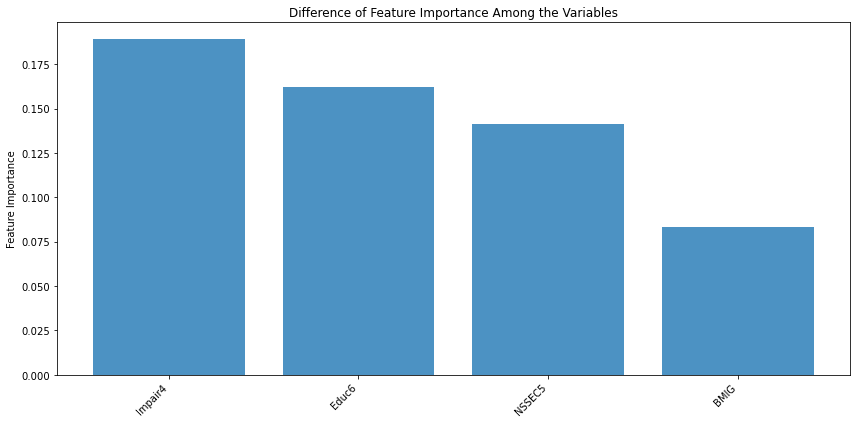

In [31]:
coefficients_4f = model1.coef_[0]
feature_importances_4f = np.abs(coefficients_4f)
fig, ax = plt.subplots(figsize=(12, 6))
feature_names_4f = X.iloc[:, fit_4f.support_].columns
sorted_indices_4f = np.argsort(feature_importances_4f)[::-1]  # Sort feature indices based on importance in descending order
sorted_importances_4f = feature_importances_4f[sorted_indices_4f]
sorted_feature_names_4f = feature_names_4f[sorted_indices_4f]

x_pos1 = np.arange(len(feature_names_4f))
ax.bar(x_pos1, sorted_importances_4f, align='center', alpha=0.8)
ax.set_xticks(x_pos1)
ax.set_xticklabels(sorted_feature_names_4f, rotation=45, ha='right')
ax.set_ylabel('Feature Importance')
ax.set_title('Difference of Feature Importance Among the Variables')
plt.tight_layout()
plt.show()

In [32]:
print('feature_names:',feature_names_4f)
print('feature_importances:',feature_importances_4f)

feature_names: Index(['Impair4', 'NSSEC5', 'Educ6', 'BMIG'], dtype='object')
feature_importances: [0.18908981 0.14123137 0.16237461 0.08334245]


#  RandomForestClassifiar

In [35]:
def map_values(value):
    if value > 0 and value <= 149:
        return 1
    elif value > 149:
        return 2
    else:
        return 0
Rfr_df = df
Rfr_df['MEMS7_SPORTCOUNT_A01'] = Rfr_df['MEMS7_SPORTCOUNT_A01'].apply(map_values)
value_counts_rfr = Rfr_df["MEMS7_SPORTCOUNT_A01"].value_counts()
value_counts_rfr

2    28187
0     7303
1     6000
Name: MEMS7_SPORTCOUNT_A01, dtype: int64

Top 1 features: AGE - Accuracy = 0.6833
Top 2 features: AGE, IMD10 - Accuracy = 0.6806
Top 3 features: AGE, IMD10, WorkStat10 - Accuracy = 0.6671
Top 4 features: AGE, IMD10, WorkStat10, BMIG - Accuracy = 0.6403
Top 5 features: AGE, IMD10, WorkStat10, BMIG, Educ6 - Accuracy = 0.6166
Top 6 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5 - Accuracy = 0.6182
Top 7 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4 - Accuracy = 0.6179
Top 8 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4, Relig7 - Accuracy = 0.6171
Top 9 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4, Relig7, Disab3 - Accuracy = 0.6283
Top 10 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4, Relig7, Disab3, Gend3 - Accuracy = 0.6348
Top 11 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4, Relig7, Disab3, Gend3, Eth7 - Accuracy = 0.6364
Top 12 features: AGE, IMD10, WorkStat10, BMIG, Educ6, NSSEC5, Child4, Relig7, Disab3, Gend3, Eth7, UrbRur2 - Accuracy =

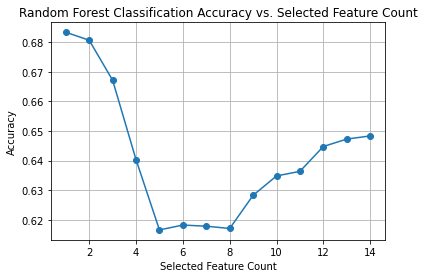

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix as skm

# Separate features (X) and target variable (y)
X = Rfr_df.iloc[:, :-1]
y = Rfr_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

# Normalize or scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and train the random forest classification model on all features
model = RandomForestClassifier(random_state=11)
model.fit(X_train_scaled, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort features based on importance
sorted_indices = np.argsort(importances)[::-1]

accuracies = []

# Evaluate model accuracy for different numbers of top features
for n_selected_features in range(1, X_train_scaled.shape[1] + 1):
    selected_features = X.columns[sorted_indices[:n_selected_features]]
    X_tr = X_train[selected_features]
    X_te = X_test[selected_features]
    X_tr_scaler = scaler.fit_transform(X_tr)
    x_te_scaler = scaler.fit_transform(X_te)
    # Train the model using only the top n features
    #model.fit(X_train_scaled[:, selected_features], y_train)
    model.fit(X_tr_scaler,y_train)
    # Evaluate the model on the test set
    #accuracy = model.score(X_test_scaled[:, selected_features], y_test)
    accuracy = model.score(x_te_scaler, y_test)
    accuracies.append(accuracy)

    print(f"Top {n_selected_features} features: {', '.join(selected_features)} - Accuracy = {accuracy:.4f}")

# Create a plot to visualize the accuracy vs. selected feature count
plt.plot(range(1, X_train_scaled.shape[1] + 1), accuracies, marker='o')
plt.xlabel('Selected Feature Count')
plt.ylabel('Accuracy')
plt.title('Random Forest Classification Accuracy vs. Selected Feature Count')
plt.grid(True)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# Create a pipeline
pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier(random_state=66))
])

# Define the parameters for GridSearch
param_grid = {
    'feature_selection__k': [1, 2, 3, 4,5,6,7,8,9,10],  # Number of top features to select
    'classifier__n_estimators': [10, 50, 100,200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the selected features
selected_features_bool = grid_search.best_estimator_.named_steps['feature_selection'].get_support()
selected_features = [column for column, selected in zip(X_train.columns, selected_features_bool) if selected]

print("Selected features:", selected_features)

# Evaluate on test set
score = grid_search.score(X_test_scaled, y_test)
print("Test set accuracy: ", score)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200, 'feature_selection__k': 9}
Selected features: ['IMD10', 'Impair4', 'Disab3', 'Relig7', 'NSSEC5', 'Educ6', 'WorkStat10', 'BMIG', 'AGE']
Test set accuracy:  0.6930492625084353


Feature ranking:
1. feature NSSEC5 (0.204063)
2. feature Disab3 (0.137132)
3. feature UrbRur2 (0.117664)
4. feature IMD10 (0.103026)
5. feature CoastComm (0.102628)
6. feature Relig7 (0.095607)
7. feature Impair4 (0.085874)
8. feature Eth7 (0.085656)
9. feature Gend3 (0.068351)


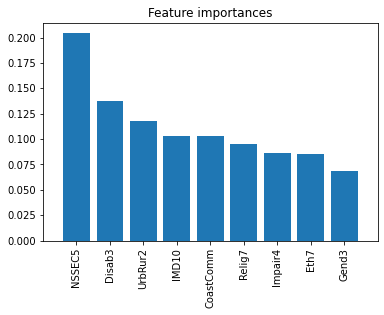

OOB Error: 0.3095090788222239


In [38]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate

best_params = grid_search.best_params_
pipe.set_params(**best_params)

# Feature importance
best_rf = grid_search.best_estimator_.named_steps['classifier']
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(len(indices)):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# mportance of drawing features
plt.figure()

plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90) 
plt.xlim([-1, len(indices)])
plt.show()

# OOB error
oob_error = 1 - cross_val_score(best_rf, X_train[selected_features], y_train, cv=10).mean()
print("OOB Error:", oob_error)

# Visualize one of the trees (for example, the first tree)
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], filled=True, feature_names=X_train.columns, max_depth=3)
plt.savefig("decision_tree.png")  # Save the figure as an image file
plt.close()  # Close the figure to prevent it from being displayed in Jupyter Notebook

In [39]:
from sklearn.model_selection import cross_val_predict
# Create a model with the best parameters
best_params = grid_search.best_params_
pipe.set_params(**best_params)

# Predict on the test set and calculate the performance index.
y_pred = grid_search.predict(X_test_scaled)

# Calculating confusion matrix
cm = skm(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculation accuracy, recall and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use' macro' to calculate the average accuracy in multi-class situations.Use' macro' to calculate the average accuracy in multi-class situations.
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a model with the best parameters
best_params = grid_search.best_params_
pipe.set_params(**best_params)

# Use cross validation to generate forecasts.
y_pred_cv = cross_val_predict(pipe, X_test_scaled, y_test, cv=10, n_jobs=-1)

# Calculating confusion matrix
cm_cv = skm(y_test, y_pred_cv)
print("Confusion Matrix (Cross-Validation):")
print(cm_cv)

# Calculation accuracy, recall and F1 score
accuracy_cv = accuracy_score(y_test, y_pred_cv)
precision_cv = precision_score(y_test, y_pred_cv, average='macro')
recall_cv = recall_score(y_test, y_pred_cv, average='macro')
f1_cv = f1_score(y_test, y_pred_cv, average='macro')

print("Accuracy (Cross-Validation):", accuracy_cv)
print("Precision (Cross-Validation):", precision_cv)
print("Recall (Cross-Validation):", recall_cv)
print("F1 Score (Cross-Validation):", f1_cv)

Confusion Matrix:
[[ 310    0 1465]
 [ 119    0 1433]
 [ 166    1 6879]]
Accuracy: 0.6930492625084353
Precision: 0.40819948722047883
Recall: 0.38364883215462714
F1 Score: 0.3598041091857951
Confusion Matrix (Cross-Validation):
[[ 329   11 1435]
 [ 125    3 1424]
 [ 197   11 6838]]
Accuracy (Cross-Validation): 0.6912175841126
Precision (Cross-Validation): 0.44351429681352145
Recall (Cross-Validation): 0.38592160238794193
F1 Score (Cross-Validation): 0.36395067367161893
